In [16]:
from cpa_robot import position_x, position_y, orientation, drive, plot_path, reset_robot

In [17]:
reset_robot()

In [18]:
print(position_x())

0


In [25]:
drive(0.1,0.2)

In [20]:
print(position_x())

0.1


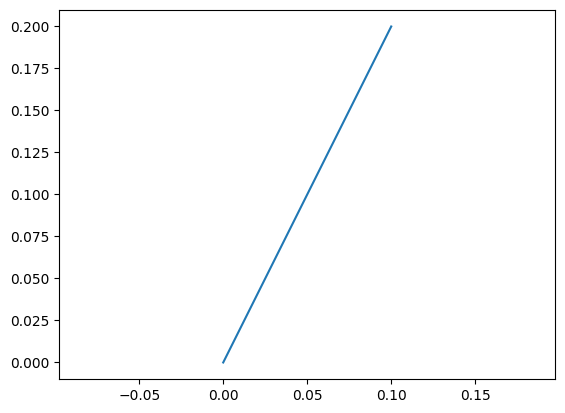

In [21]:
plot_path()

In [27]:
drive(0.3,0.1)

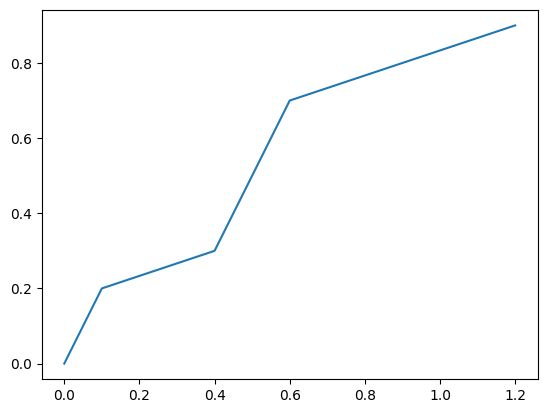

In [28]:
plot_path()